## Введение в DS на УБ и МиРА (2022)
### Домашнее задание #5:  Ближайшие соседи
Дедлайн: 19 июня 2022 года, 23:59
Правила игры

Домашнее задание состоит из двух частей, которые оцениваются в 3 - 7 балла. Все пункты в пределах одной части имеют одинаковый вес.

Решения принимаются до 19 июня 2022 года, 23:59 МСК включительно. Работы, отправленные после дедлайна, не проверяются. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

Все решения нужно загрузить в личный репозиторий на GitHub Classroom.

Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

Плагиат не допускается. При обнаружении случаев списывания, 
0
 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.


 ---

В этом задании будем предсказывать удовлетворенность студентов их программой (`LikeDegree`). Скачайте  Student_Behaviour.csv, содержащую информацию о студентов бакалавриата.


### Часть 1: Исследуем данные
**Задание 1.** Загрузите данные из файла Student_Behaviour.csv. Выведите первые 5 строк таблицы.

пока нам понадобится только pandas

In [135]:
import pandas

загрузим данные из student_behaviour

In [136]:
behaviour = pandas.read_csv('Student_Behaviour.csv', index_col=None)

выведем первые 5 строк с помощью функции head

In [137]:
behaviour.head(n = 5)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


**Задание 2.** Проверьте колонки на наличие пропусков, избавьтесь их. 

для проверки на пропуски сравним длинны датасетов с удаленными пропусками и без удалений

In [138]:
behaviour.shape

(235, 19)

In [139]:
behaviour.dropna().shape

(235, 19)

длинны одинаковы, пропусков нет

**Задание 3.**  Колонку `CareerBasedonDegree` приведите к числовому виду.

посмотрим в каком виде представленны данные в данном столбце

In [140]:
behaviour['CareerBasedonDegree']

0      50%
1      75%
2      50%
3      50%
4      25%
      ... 
230    50%
231    75%
232    50%
233    75%
234    75%
Name: CareerBasedonDegree, Length: 235, dtype: object

очевидно это строки, удалим процент и приведем к int, еще можем нормализовать эту колонку

In [141]:
behaviour['CareerBasedonDegree'].apply(lambda x: int(x[:-1])/100)

0      0.50
1      0.75
2      0.50
3      0.50
4      0.25
       ... 
230    0.50
231    0.75
232    0.50
233    0.75
234    0.75
Name: CareerBasedonDegree, Length: 235, dtype: float64

отлично, теперь сохраним полученный результат

In [142]:
behaviour['CareerBasedonDegree'] = behaviour['CareerBasedonDegree'].apply(lambda x: int(x[:-1])/100)

**Задание 4.**  В датасете есть 3 поля, с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Извлеките минимальное время(левую границу интервала) для каждой из этих переменных и переведите в минуты, запишите в новые столбцы, удалите старые.

попробуем найти эти поля с данным суффиксом

In [143]:
behaviour.columns

Index(['CertificationCourses', 'Gender', 'Department', 'Height(CM)',
       'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'Hobbies',
       'DailyStudingTime', 'PreferToStudyIn', 'SalaryExpectation',
       'LikeDegree', 'CareerBasedonDegree', 'GamesSpendingTime',
       'TravellingTime ', 'StressLevel ', 'FinancialStatus', 'PartTimeJob?'],
      dtype='object')

In [144]:
behaviour['DailyStudingTime']

0       0 - 30 minute
1      30 - 60 minute
2          1 - 2 Hour
3          1 - 2 Hour
4      30 - 60 minute
            ...      
230    30 - 60 minute
231        2 - 3 hour
232    30 - 60 minute
233     0 - 30 minute
234        3 - 4 hour
Name: DailyStudingTime, Length: 235, dtype: object

найдем классы и поменяем их на числовое значение соответствующее нижней границе диапазона

In [145]:
behaviour['DailyStudingTime'].value_counts().index

Index(['30 - 60 minute', '1 - 2 Hour', '0 - 30 minute', '2 - 3 hour',
       '3 - 4 hour', 'More Than 4 hour'],
      dtype='object')

можно автоматизировать процесс используя регулярные выражения

In [146]:
columns_time = ['GamesSpendingTime', 'DailyStudingTime', 'TravellingTime ']

In [147]:
import re

# патерн для регулярного выражения r'-?\d+\.?\d*' выводит только числа из строки
column = columns_time[0]

for i in behaviour[column].unique():
    behaviour.loc[behaviour[column] == i, column] = \
    min([float(s) for s in re.findall(r'-?\d+\.?\d*', i)])
    #findall находит все совпадения и потом берем минимальное из них
behaviour[column] = behaviour[column]\
    .apply(lambda x: x*60 if x<30 else x) 
    # переводим данные в минуты

In [148]:
#найдем минимум
behaviour[column].min()

0.0

повторим для остальных столбцов

In [149]:
column = columns_time[1]

for i in behaviour[column].unique():
    behaviour.loc[behaviour[column] == i, column] = \
    min([float(s) for s in re.findall(r'-?\d+\.?\d*', i)])
    #findall находит все совпадения и потом берем минимальное из них
behaviour[column] = behaviour[column]\
    .apply(lambda x: x*60 if x<30 else x) 
    # переводим данные в минуты

In [150]:
#найдем минимум
behaviour[column].min()

0.0

In [151]:
column = columns_time[2]

for i in behaviour[column].unique():
    behaviour.loc[behaviour[column] == i, column] = \
    min([float(s) for s in re.findall(r'-?\d+\.?\d*', i)])
    #findall находит все совпадения и потом берем минимальное из них
behaviour[column] = behaviour[column]\
    .apply(lambda x: x*60 if x<30 else x) 
    # переводим данные в минуты

In [152]:
#найдем минимум
behaviour[column].min()

0.0

In [153]:
#проверим 
behaviour[columns_time]

,GamesSpendingTime,DailyStudingTime,TravellingTime
0,78.0,0.0,30.0
1,60.0,30.0,0.0
2,120.0,60.0,30.0
3,78.0,60.0,0.0
4,78.0,30.0,30.0
...,...,...,...
230,120.0,30.0,30.0
231,30.0,120.0,30.0
232,30.0,30.0,138.0
233,120.0,0.0,138.0


**Задание 5.**  Выбрете колонки (непрерывные переменные), которые будете использовать для предсказания целевой переменной с помощью knn

выберем колонки с непрерывными переменными

In [154]:
behaviour.tail(9)

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
226,Yes,Female,Commerce,167.0,65.0,93.0,85.0,90.0,Reading books,60.0,Night,15000,Yes,0.75,30.0,30.0,Good,good,No
227,Yes,Male,B.com ISM,167.0,55.0,55.0,57.0,60.0,Sports,30.0,Anytime,17000,Yes,0.25,0.0,0.0,Awful,Bad,No
228,Yes,Male,B.com ISM,155.0,68.0,75.0,75.0,65.0,Sports,60.0,Anytime,500,Yes,1.00,78.0,60.0,Good,good,No
229,No,Female,B.com ISM,153.0,60.0,60.0,70.0,70.0,Sports,60.0,Anytime,15000,Yes,0.75,60.0,0.0,Good,Bad,No
230,Yes,Male,B.com ISM,170.0,76.0,72.0,67.0,65.0,Video Games,30.0,Morning,7000,Yes,0.50,120.0,30.0,Bad,Bad,No
231,Yes,Male,B.com ISM,172.0,52.0,72.0,70.0,76.0,Cinema,120.0,Anytime,25000,Yes,0.75,30.0,30.0,Good,good,No
232,Yes,Female,BCA,139.0,33.0,90.0,75.0,70.0,Cinema,30.0,Night,20000,Yes,0.50,30.0,138.0,Bad,good,No
233,Yes,Female,Commerce,153.0,58.0,85.0,74.0,75.0,Cinema,0.0,Anytime,20000,Yes,0.75,120.0,138.0,Awful,good,No
234,No,Female,B.com ISM,155.0,39.0,45.0,45.0,50.0,Sports,180.0,Night,10,No,0.75,30.0,138.0,fabulous,good,No


непрервными являются эти колонки ['10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation', 'Height(CM)', 'Weight(KG)']

не будем использовать 'Height(CM)', 'Weight(KG)' а остальные оставим

In [155]:
behaviour = behaviour.drop(columns=['Height(CM)', 'Weight(KG)'])

**Задание 6.**  Есть ли в выбранных колонках выбросы? (Пока не нужно их чистить)

для проверки данных на выбросы можем построить графики и в ручную взглянуть на данные

In [156]:
import matplotlib.pyplot as plt

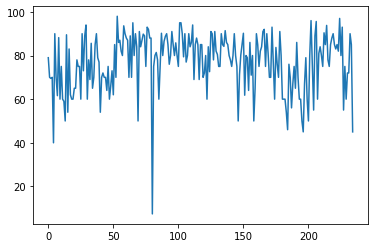

In [157]:
plt.plot(behaviour['10Mark'])

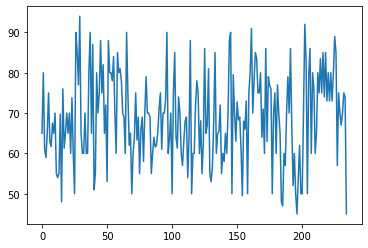

In [158]:
plt.plot(behaviour['12Mark'])

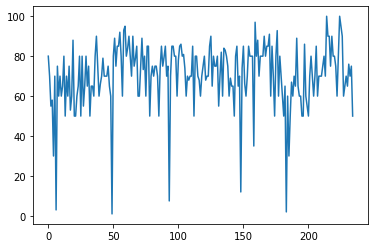

In [159]:
plt.plot(behaviour['CollegeMark'])

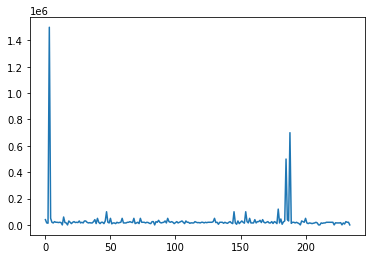

In [160]:
plt.plot(behaviour['SalaryExpectation'])

все выглядят правдоподобно кроме salsry expectation, там явно есть выбросы

**Задание 7.**  Как распределена целевая переменная? Нет ли дисбаланса классов? Если есть дисбаланс, какие метрики качества классификатора можно использовать, какие нет? Рассматриваем метрики, которые проходили в рамках курса.

для проверки достаточно посчитать записи относящейся к каждому классу

In [161]:
behaviour['LikeDegree'].value_counts()

Yes    215
No      20
Name: LikeDegree, dtype: int64

есть дисбаланс

при дисбалансе используем recall, precision, f1/

**Задание 8.**  Переведите целевую переменную к численному формату.

In [162]:
behaviour["LikeDegree"] = 1 * (behaviour["LikeDegree"] == 'Yes')
behaviour["LikeDegree"]

0      0
1      1
2      1
3      0
4      1
      ..
230    1
231    1
232    1
233    1
234    0
Name: LikeDegree, Length: 235, dtype: int64

### Часть 2: Строим модели
**Задание 1.** Разбейте выборку на обучающую и тестовую. 

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
features = ['10Mark', '12Mark', 'CollegeMark', 'SalaryExpectation']

In [165]:
X = behaviour[features]

y = behaviour['LikeDegree']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    train_size=.7, random_state=9, stratify=None)

**Задание 2.** Постройте наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной (см. семинар 11). В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

в роли наивной модели будет выступать y_predicted нужной длинны

In [167]:
y_test.shape

(71,)

In [168]:
import numpy
naive_prediction = numpy.zeros(71, dtype=int)

**Задание 3.** Постройте модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [169]:
from sklearn.neighbors import KNeighborsClassifier

построим модели с помощью цикла, соберем их в лист

In [179]:
i = 3
mods = []
while i != 9:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    mods.append(model)
    i+=2
    

**Задание 4.** Постройте метрики качества на тестовой выборке (3 известных вам) для моделей из 1 и 2 задания и сравните между собой. Какая победила? 

In [180]:
from sklearn.metrics import recall_score, f1_score, precision_score

In [181]:
(recall_score(y_test, naive_prediction), f1_score(y_test, naive_prediction), precision_score(y_test, naive_prediction))

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0, 0.0)

In [182]:
for i in [0, 1, 2]:
    print(recall_score(y_test, mods[i].predict(X_test)),\
 f1_score(y_test, mods[i].predict(X_test)),\
 precision_score(y_test, mods[i].predict(X_test)))



0.9375 0.9160305343511451 0.8955223880597015
1.0 0.9481481481481481 0.9014084507042254
1.0 0.9481481481481481 0.9014084507042254


модели с 5 и 7 соседей сработали лучше чем с 3 соседями и наивной модели

**Задание 5.** Примените шкалирование (MinMax, обучите его на обучающей выборке к факторам, затем примените к тестовой), снова постройте модели для нескольких вариантов соседей (3, 5, 7). Помогло ли шкалирование? 

In [184]:
from sklearn.preprocessing import MinMaxScaler

In [185]:
mm_sc = MinMaxScaler(copy=False).fit(X_train)
X_train, X_test = mm_sc.transform(X_train), mm_sc.transform(X_test)

In [186]:
i = 3
mods = []
while i != 9:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    mods.append(model)
    i+=2
    

In [187]:
for i in [0, 1, 2]:
    print(recall_score(y_test, mods[i].predict(X_test)),\
 f1_score(y_test, mods[i].predict(X_test)),\
 precision_score(y_test, mods[i].predict(X_test)))


0.984375 0.9473684210526315 0.9130434782608695
1.0 0.9481481481481481 0.9014084507042254
1.0 0.9481481481481481 0.9014084507042254


повысился результат лишь у модели с 3 соседями

**Задание 6.** Избавьтесь от выбросов в исходной выборке, затем снова разделите ее на тестовую и обучающую, постройте модель для нескольких вариантов числа соседей(3, 5, 7). Какое число соседей лучшее и почему? Улучшилось ли качество модели по сравнению со лучшей моделью, в которой было применено шкалирование из задания 5?

In [189]:
behaviour = behaviour.loc[behaviour['SalaryExpectation'] <= 1.5e5]

In [190]:
X = behaviour[features]

y = behaviour['LikeDegree']
X_train, X_test, y_train, y_test = train_test_split(X, y,\
                                                    train_size=.7, random_state=9, stratify=None)

In [191]:
i = 3
mods = []
while i != 9:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    mods.append(model)
    i+=2
    

In [192]:
for i in [0, 1, 2]:
    print(recall_score(y_test, mods[i].predict(X_test)),\
 f1_score(y_test, mods[i].predict(X_test)),\
 precision_score(y_test, mods[i].predict(X_test)))


1.0 0.955223880597015 0.9142857142857143
1.0 0.955223880597015 0.9142857142857143
1.0 0.955223880597015 0.9142857142857143


теперь же резултаты совсем сравнялись

**Задание 7.** Какая конфигурация модели получилась лучшей? Почему?Выбираем из всех построенных моделей, не забудьте про наивный прогноз и все рассмотренне варианты числа соседей. 

Наивная модель конечно же не показала результат. Если бы она предсказывала класс которого больше, она бы выдавала более высокую метрику, но тем не менее смысла в такой модели нет. 

после удаления выбросов мы получили самый большое качество моделей (самые большие метрики), можно сказать что модели с 5 и 7 соседями сраюотали лучше